## Análise Espacial - MBA em DSA - USP-ESALQ - Prof. Dr. Rafael de Freitas Souza

## Aula 1 - Script Shapefiles

### Instalando os pacotes necessários - Verifique quais pacotes vc já tem instalado no seu env. Caso algum não esteja instalado, basta tirar o # do comando.

## Importando as bibliotecas

In [ ]:
#pip install shapely

In [ ]:
#pip install pyproj

In [ ]:
#pip install geopandas

In [ ]:
#pip install fiona

In [ ]:
#pip install folium

In [ ]:
#pip install matplotlib

In [ ]:
#pip install mapclassify

In [ ]:
#pip install pyreadr

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import shapely
import fiona
import pyproj
import folium
import mapclassify

In [3]:
import geopandas as gpd

# Parte introdutória

## Carregando os dados

In [4]:
# Esse enconding serviu para os dados no meu ambiente.
shp_sp = gpd.read_file('shapefiles/estado_sp.shp', encoding = 'windows-1252')

<AxesSubplot:>

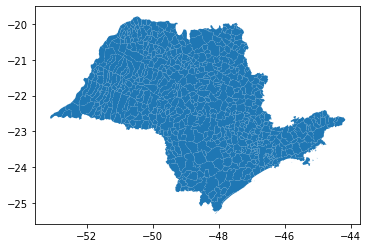

In [5]:
shp_sp.plot()

### Características do shapefile

In [6]:
print(type(shp_sp)) #Mostra que o objeto é do tipo GeoDataFrame
print(len(shp_sp)) #Quantidade de polignonos (municípios)
print(shp_sp.bounds) #Valores min e max do poligono nos eixos X e Y
print(shp_sp.info())
shp_sp.crs #Indica o CRS do dataset

<class 'geopandas.geodataframe.GeoDataFrame'>
645
          minx       miny       maxx       maxy
0   -52.143937 -22.048043 -51.842772 -21.542203
1   -51.772476 -21.169553 -51.419364 -20.623419
2   -51.714020 -21.687227 -51.476173 -21.427075
3   -51.784409 -22.573239 -51.570975 -22.392396
4   -52.764311 -22.634556 -52.444825 -22.387248
..         ...        ...        ...        ...
640 -51.644248 -21.233111 -51.401449 -21.049708
641 -51.890176 -22.670360 -51.413043 -22.197747
642 -51.483948 -22.205720 -51.223621 -21.721309
643 -51.424227 -21.887062 -51.325184 -21.738077
644 -51.459082 -22.674490 -51.218957 -22.323882

[645 rows x 4 columns]
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NM_MUNICIP  645 non-null    object  
 1   CD_GEOCMU   645 non-null    object  
 2   geometry    645 non-null    geometry
dtypes: geometry(1), object(

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
shp_sp.head()

,NM_MUNICIP,CD_GEOCMU,geometry
0,CAIUA,3509106,"POLYGON ((-51.86001 -21.58072, -51.85892 -21.5..."
1,CASTILHO,3511003,"POLYGON ((-51.41936 -20.68108, -51.41942 -20.6..."
2,DRACENA,3514403,"POLYGON ((-51.48515 -21.42765, -51.48500 -21.4..."
3,ESTRELA DO NORTE,3515301,"POLYGON ((-51.57097 -22.39887, -51.57099 -22.3..."
4,EUCLIDES DA CUNHA PAULISTA,3515350,"POLYGON ((-52.44569 -22.60828, -52.44569 -22.6..."


In [8]:
### Alterando o nome das colunas para facilitar a manipulação dos dados
shp_sp.rename(columns = {'NM_MUNICIP':'municipio', 'CD_GEOCMU': 'codigo'}, inplace = True)
shp_sp

,municipio,codigo,geometry
0,CAIUA,3509106,"POLYGON ((-51.86001 -21.58072, -51.85892 -21.5..."
1,CASTILHO,3511003,"POLYGON ((-51.41936 -20.68108, -51.41942 -20.6..."
2,DRACENA,3514403,"POLYGON ((-51.48515 -21.42765, -51.48500 -21.4..."
3,ESTRELA DO NORTE,3515301,"POLYGON ((-51.57097 -22.39887, -51.57099 -22.3..."
4,EUCLIDES DA CUNHA PAULISTA,3515350,"POLYGON ((-52.44569 -22.60828, -52.44569 -22.6..."
...,...,...,...
640,NOVA INDEPENDÊNCIA,3533205,"POLYGON ((-51.47556 -21.04971, -51.47459 -21.0..."
641,PIRAPOZINHO,3539202,"POLYGON ((-51.47369 -22.19974, -51.47334 -22.1..."
642,PRESIDENTE PRUDENTE,3541406,"POLYGON ((-51.28281 -21.72270, -51.28278 -21.7..."
643,SANTO EXPEDITO,3548302,"POLYGON ((-51.36795 -21.74799, -51.36735 -21.7..."


### Acessando os dados

In [9]:
shp_sp[shp_sp['municipio'] == 'SÃO PAULO']

,municipio,codigo,geometry
550,SÃO PAULO,3550308,"POLYGON ((-46.53544 -23.36330, -46.53583 -23.3..."


In [10]:
shp_sp['codigo']

0      3509106
1      3511003
2      3514403
3      3515301
4      3515350
        ...   
640    3533205
641    3539202
642    3541406
643    3548302
644    3552908
Name: codigo, Length: 645, dtype: object

In [11]:
shp_sp['geometry']

0      POLYGON ((-51.86001 -21.58072, -51.85892 -21.5...
1      POLYGON ((-51.41936 -20.68108, -51.41942 -20.6...
2      POLYGON ((-51.48515 -21.42765, -51.48500 -21.4...
3      POLYGON ((-51.57097 -22.39887, -51.57099 -22.3...
4      POLYGON ((-52.44569 -22.60828, -52.44569 -22.6...
                             ...                        
640    POLYGON ((-51.47556 -21.04971, -51.47459 -21.0...
641    POLYGON ((-51.47369 -22.19974, -51.47334 -22.1...
642    POLYGON ((-51.28281 -21.72270, -51.28278 -21.7...
643    POLYGON ((-51.36795 -21.74799, -51.36735 -21.7...
644    POLYGON ((-51.35006 -22.32492, -51.34833 -22.3...
Name: geometry, Length: 645, dtype: geometry

## Plotando o mapa
### Veja que é muuuuuuuito mais rápido que o R. Na minha máquina, a plotagem no R demorou mais de 30s

<AxesSubplot:>

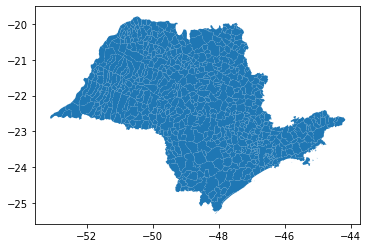

In [12]:
shp_sp.plot()

### Usando o método explore para criar um mapa interativo

In [ ]:
shp_sp.explore()

# Manipulação dos dados

## Cálculo da área

### Veja que no R a library para calcular a área o faz, independentement do fato da unidade dos dados ser em graus ou metros, devido ao CRS. No python, temos que usar um CRS em metros, ou seja, a referência é a mesma, mas, em vez de lat e long vamos usar metros. Como nosso shapefile estava em lat/long usamos o 5880.

In [14]:
#Mostra que a unidade do CRS é em graus (longitude e latitude) -> Vai precisar alterar para metros para calcular as áreas
shp_sp.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [15]:
#CRS retirados de https://epsg.io/?q=brazil
#Transforma para o CRS 5880 que está com unidade em metros
shp_sp_m = shp_sp.to_crs(5880)

In [16]:
shp_sp_m.crs

<Derived Projected CRS: EPSG:5880>
Name: SIRGAS 2000 / Brazil Polyconic
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Brazil - onshore and offshore. Includes Rocas, Fernando de Noronha archipelago, Trindade, Ihlas Martim Vaz and Sao Pedro e Sao Paulo.
- bounds: (-74.01, -35.71, -25.28, 7.04)
Coordinate Operation:
- name: Brazil Polyconic
- method: American Polyconic
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Note que as unidade dos eixos x e y do mapa, agora estão em metros. 

<AxesSubplot:>

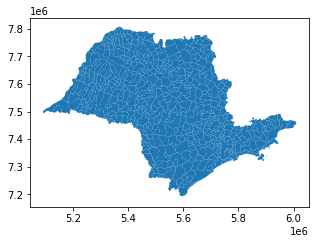

In [17]:
shp_sp_m.plot(figsize=(5,5))

In [18]:
shp_sp_m['area'] = shp_sp_m.area/1000000 #Cria um novo feature no dataframe, chamado area, com os valores calculados.
shp_sp_m
# Veja que o valor das áreas calculadas tem uma pequena diferença em relação ao R...

,municipio,codigo,geometry,area
0,CAIUA,3509106,"POLYGON ((5221616.620 7611103.065, 5221725.820...",551.451660
1,CASTILHO,3511003,"POLYGON ((5268864.188 7710094.299, 5268857.980...",1066.159482
2,DRACENA,3514403,"POLYGON ((5260706.354 7627483.960, 5260721.837...",488.065194
3,ESTRELA DO NORTE,3515301,"POLYGON ((5250108.012 7520011.021, 5250105.712...",265.175088
4,EUCLIDES DA CUNHA PAULISTA,3515350,"POLYGON ((5159804.770 7498008.777, 5159804.756...",574.044194
...,...,...,...,...
640,NOVA INDEPENDÊNCIA,3533205,"POLYGON ((5262368.969 7669343.079, 5262469.569...",265.248667
641,PIRAPOZINHO,3539202,"POLYGON ((5260493.026 7541912.425, 5260528.926...",478.028447
642,PRESIDENTE PRUDENTE,3541406,"POLYGON ((5281111.059 7594437.238, 5281111.259...",561.158602
643,SANTO EXPEDITO,3548302,"POLYGON ((5272256.061 7591786.876, 5272315.607...",94.551650


### Visualização interativa

In [ ]:
shp_sp_m.explore("area")

## E caso haja a necessidade da inserção de dados externos?

### Vamos usar a biblioteca pyreadr para ler arquivos do tipo RData no Python

In [19]:
import pyreadr

In [20]:
dadossp = pyreadr.read_r('dados_sp.RData')

In [21]:
dadossp

OrderedDict([('dados_sp',
                      codigo  populacao  densidade_pop    idh       pib
              0    3500105.0    35023.0          82.15  0.790  32838.70
              1    3500204.0     3571.0          16.85  0.730  23911.98
              2    3500303.0    35954.0          67.72  0.715  21719.50
              3    3500402.0     8137.0          53.05  0.781  17688.07
              4    3500501.0    18599.0         287.16  0.745  24727.02
              ..         ...        ...            ...    ...       ...
              640  3557006.0   121331.0         591.04  0.767  36917.03
              641  3557105.0    93736.0         201.15  0.790  29120.96
              642  3557154.0     2684.0           7.32  0.729  29149.67
              643  3557204.0    12418.0          64.40  0.729  16066.88
              644  3557303.0    11198.0         135.35  0.740  21331.37
              
              [645 rows x 5 columns])])

In [22]:
# Veja que o tipo de objeto é um dicionário ordenado.
type(dadossp)

collections.OrderedDict

In [23]:
# Vamos obter a chave do dicionário para poder extrair os dados.
print(dadossp.keys())

odict_keys(['dados_sp'])


In [24]:
dados_sp = dadossp['dados_sp']

In [25]:
dados_sp

,codigo,populacao,densidade_pop,idh,pib
0,3500105.0,35023.0,82.15,0.790,32838.70
1,3500204.0,3571.0,16.85,0.730,23911.98
2,3500303.0,35954.0,67.72,0.715,21719.50
3,3500402.0,8137.0,53.05,0.781,17688.07
4,3500501.0,18599.0,287.16,0.745,24727.02
...,...,...,...,...,...
640,3557006.0,121331.0,591.04,0.767,36917.03
641,3557105.0,93736.0,201.15,0.790,29120.96
642,3557154.0,2684.0,7.32,0.729,29149.67
643,3557204.0,12418.0,64.40,0.729,16066.88


In [26]:
#O código do municipio era um número float e precisa ser transformado em str para poder ser utilizado com o shapefile.
dados_sp['codigo'] = dados_sp['codigo'].astype(int)
dados_sp['codigo'] = dados_sp['codigo'].astype(str)

## Fazendo o merge dos dois datasets, usando o codigo como index

In [27]:
print(shp_sp_m.columns)
print(dados_sp.columns)

Index(['municipio', 'codigo', 'geometry', 'area'], dtype='object')
Index(['codigo', 'populacao', 'densidade_pop', 'idh', 'pib'], dtype='object')


In [28]:
shp_dados_sp = shp_sp_m.merge(dados_sp, how='inner', on='codigo')

In [29]:
print(shp_dados_sp.shape)
shp_dados_sp.head()

(645, 8)


,municipio,codigo,geometry,area,populacao,densidade_pop,idh,pib
0,CAIUA,3509106,"POLYGON ((5221616.620 7611103.065, 5221725.820...",551.451660,5800.0,9.16,0.697,13996.95
1,CASTILHO,3511003,"POLYGON ((5268864.188 7710094.299, 5268857.980...",1066.159482,20738.0,16.89,0.731,29524.83
2,DRACENA,3514403,"POLYGON ((5260706.354 7627483.960, 5260721.837...",488.065194,46536.0,88.64,0.776,24326.29
3,ESTRELA DO NORTE,3515301,"POLYGON ((5250108.012 7520011.021, 5250105.712...",265.175088,2762.0,10.09,0.740,30148.17
4,EUCLIDES DA CUNHA PAULISTA,3515350,"POLYGON ((5159804.770 7498008.777, 5159804.756...",574.044194,9419.0,16.66,0.704,11689.99


Text(0.5, 1.0, 'IDH')

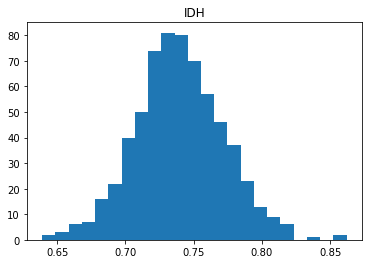

In [30]:
plt.hist(shp_dados_sp['idh'], bins = 'auto')
plt.title("IDH")

<AxesSubplot:ylabel='Frequency'>

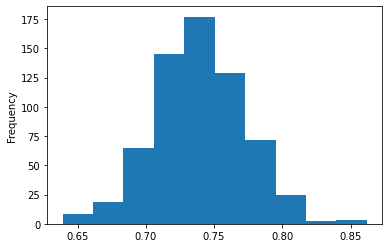

In [31]:
shp_dados_sp['idh'].plot(kind = 'hist')

# Visualização de dados espaciais

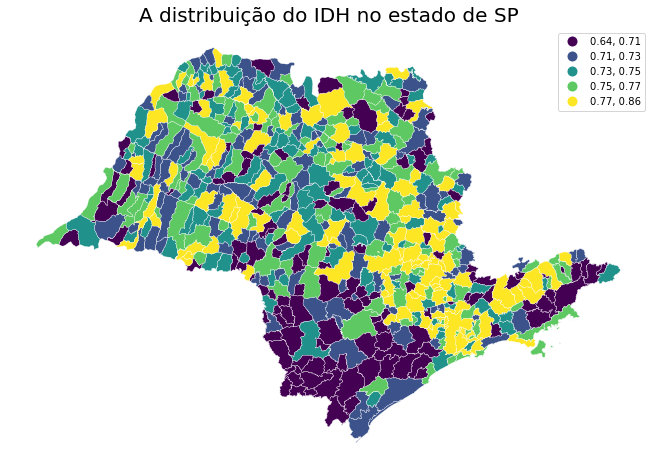

In [32]:
f, ax = plt.subplots(1, figsize=(12, 8))
shp_dados_sp.plot(column='idh', scheme='QUANTILES', ax=ax,
        edgecolor='white', legend=True, linewidth=0.3)
ax.set_axis_off()
plt.title('A distribuição do IDH no estado de SP', fontsize = 20)

plt.show()

In [33]:
shp_dados_sp.head()

,municipio,codigo,geometry,area,populacao,densidade_pop,idh,pib
0,CAIUA,3509106,"POLYGON ((5221616.620 7611103.065, 5221725.820...",551.451660,5800.0,9.16,0.697,13996.95
1,CASTILHO,3511003,"POLYGON ((5268864.188 7710094.299, 5268857.980...",1066.159482,20738.0,16.89,0.731,29524.83
2,DRACENA,3514403,"POLYGON ((5260706.354 7627483.960, 5260721.837...",488.065194,46536.0,88.64,0.776,24326.29
3,ESTRELA DO NORTE,3515301,"POLYGON ((5250108.012 7520011.021, 5250105.712...",265.175088,2762.0,10.09,0.740,30148.17
4,EUCLIDES DA CUNHA PAULISTA,3515350,"POLYGON ((5159804.770 7498008.777, 5159804.756...",574.044194,9419.0,16.66,0.704,11689.99


### Gráfico interativo relacionado à alguma feature

In [ ]:
shp_dados_sp.explore('pib')

# Desmembrando shapefiles

In [34]:
shp_mundo = gpd.read_file('shapefiles/mundo.shp')
#shp_sp = gpd.read_file('estado_sp.shp', encoding = 'windows-1252')

<AxesSubplot:>

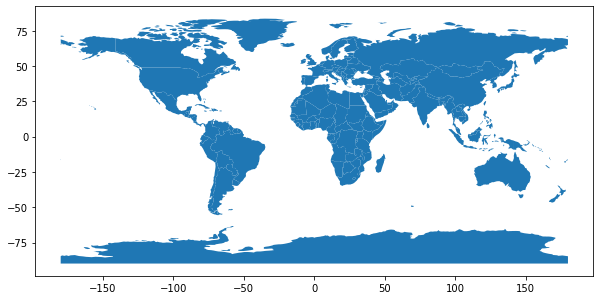

In [35]:
shp_mundo.plot(figsize = (10,10))

In [36]:
shp_mundo.head()

,iso_a3,name,sovrgnt,contnnt,area,pop_est,pp_st_d,economy,incm_gr,gdp_cp_,life_xp,wll_bng,fotprnt,ineqlty,HPI,geometry
0,AFG,Afghanistan,Afghanistan,Asia,6.528600e+05,28400000.0,43.500904,7. Least developed region,5. Low income,784.154930,59.668,3.8,0.79,0.426557,20.225350,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Angola,Africa,1.246700e+06,12799293.0,10.266538,7. Least developed region,3. Upper middle income,8617.663491,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,Albania,Europe,2.740000e+04,3639453.0,132.826752,6. Developing region,4. Lower middle income,5992.658787,77.347,5.5,2.21,0.165134,36.766874,"POLYGON ((20.59025 41.85540, 20.46318 41.51509..."
3,ARE,United Arab Emirates,United Arab Emirates,Asia,7.125217e+04,4798491.0,67.345189,6. Developing region,2. High income: nonOECD,38407.907819,NaN,NaN,NaN,NaN,NaN,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,Argentina,South America,2.736690e+06,40913584.0,14.950025,5. Emerging region: G20,3. Upper middle income,14027.126052,75.927,6.5,3.14,0.164238,35.190244,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."


## Plotando somente a América do Sul

In [37]:
#Criando um filtro
americadosul = shp_mundo['contnnt'] == 'South America'

<AxesSubplot:>

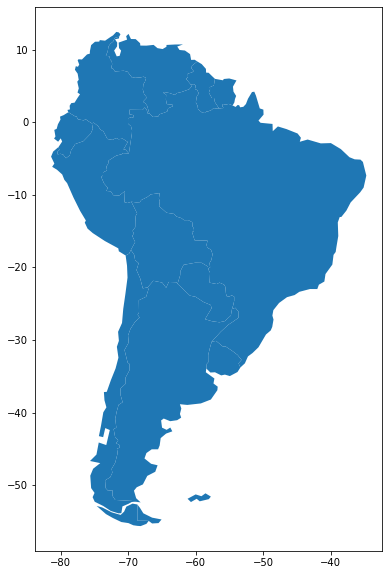

In [38]:
shp_mundo[americadosul].plot(figsize=(10,10))

# Combinando shapefiles

## Carregando os shapefiles necessários

In [39]:
shp_argentina = gpd.read_file('shapefiles/argentina_shapefile.shp')
shp_brasil = gpd.read_file('shapefiles/brasil_shapefile.shp')
shp_paraguai = gpd.read_file('shapefiles/paraguai_shapefile.shp')
shp_venezuela = gpd.read_file('shapefiles/venezuela_shapefile.shp')

In [40]:
shp_mercosul = gpd.GeoDataFrame(pd.concat([shp_argentina, shp_brasil, shp_paraguai, shp_venezuela]))

In [41]:
shp_mercosul

,nome,mercosul,geometry
0,Argentina,membro pleno,"MULTIPOLYGON (((-65.74806 -22.11167, -65.19020..."
0,Brasil,membro pleno,"MULTIPOLYGON (((-60.09834 5.21722, -60.14751 4..."
0,Paraguai,membro pleno,"POLYGON ((-54.33056 -24.67945, -54.59891 -25.5..."
0,Venezuela,membro suspenso,"MULTIPOLYGON (((-69.77084 11.69611, -68.41833 ..."


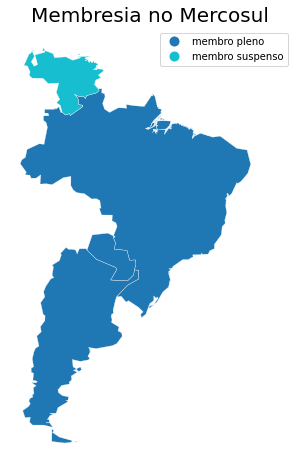

In [42]:
f, ax = plt.subplots(1, figsize=(12, 8))
shp_mercosul.plot(column='mercosul', ax=ax,
        edgecolor='white', legend=True, linewidth=0.3)
ax.set_axis_off()
plt.title('Membresia no Mercosul', fontsize = 20)

plt.show()

# Referências

- https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/geographic-vs-projected-coordinate-reference-systems-python/
- https://epsg.io/
- https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/epsg-proj4-coordinate-reference-system-formats-python/
- https://spatialreference.org/ref/epsg/